In [5]:
import sys
sys.path.append("../codes/")
from Readfiles import getFnames
from DCdata import readReservoirDC
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from SimPEG.EM.Static import DC
from SimPEG import EM
from SimPEG import Mesh

Read DC data

TypeError: plot_pseudoSection() got an unexpected keyword argument 'sameratio'

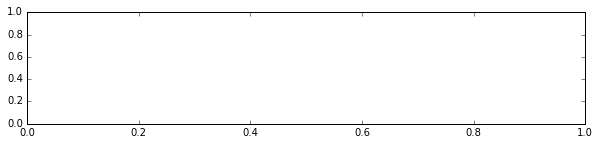

In [7]:
fname = "../data/ChungCheonDC/20150101000000.apr"
survey = readReservoirDC(fname)
dobsAppres = survey.dobs
fig, ax = plt.subplots(1,1, figsize = (10, 2))
dat = EM.Static.Utils.StaticUtils.plot_pseudoSection(survey, ax, dtype='volt', sameratio=False)
cb = dat[2]
cb.set_label("Apprent resistivity (ohm-m)")
geom = np.hstack(dat[3])
dobsDC = dobsAppres * geom 

In [8]:
# problem = DC.Problem2D_CC(mesh)
cs = 2.5
npad = 6
hx = [(cs,npad, -1.3),(cs,160),(cs,npad, 1.3)]
hy = [(cs,npad, -1.3),(cs,20)]
mesh = Mesh.TensorMesh([hx, hy])
mesh = Mesh.TensorMesh([hx, hy],x0=[-mesh.hx[:6].sum()-0.25, -mesh.hy.sum()])

In [9]:
def from3Dto2Dsurvey(survey):
    srcLists2D = []
    nSrc = len(survey.srcList)

    for iSrc in range (nSrc):
        src = survey.srcList[iSrc]
        locsM = np.c_[src.rxList[0].locs[0][:,0], np.ones_like(src.rxList[0].locs[0][:,0])*-0.75] 
        locsN = np.c_[src.rxList[0].locs[1][:,0], np.ones_like(src.rxList[0].locs[1][:,0])*-0.75] 
        rx = DC.Rx.Dipole_ky(locsM, locsN)
        locA = np.r_[src.loc[0][0], -0.75]
        locB = np.r_[src.loc[1][0], -0.75]
        src = DC.Src.Dipole([rx], locA, locB)
        srcLists2D.append(src)
    survey2D = DC.Survey_ky(srcLists2D)
    return survey2D

In [10]:
from SimPEG import (Mesh, Maps, Utils, DataMisfit, Regularization,
                    Optimization, Inversion, InvProblem, Directives)

In [11]:
mapping = Maps.ExpMap(mesh)
survey2D = from3Dto2Dsurvey(survey)
problem = DC.Problem2D_N(mesh, mapping=mapping)
problem.pair(survey2D)
m0 = np.ones(mesh.nC)*np.log(1e-2)

<function __main__.foo>

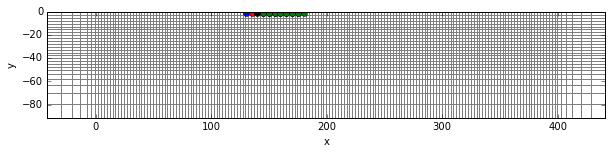

In [12]:
from ipywidgets import interact
nSrc = len(survey2D.srcList)
def foo(isrc):
    figsize(10, 5)
    mesh.plotImage(np.ones(mesh.nC)*np.nan, gridOpts={"color":"k", "alpha":0.5}, grid=True)
#     isrc=0
    src = survey2D.srcList[isrc]
    plt.plot(src.loc[0][0], src.loc[0][1], 'bo')
    plt.plot(src.loc[1][0], src.loc[1][1], 'ro')
    locsM = src.rxList[0].locs[0]
    locsN = src.rxList[0].locs[1]
    plt.plot(locsM[:,0], locsM[:,1], 'ko')
    plt.plot(locsN[:,0], locsN[:,1], 'go')
    plt.gca().set_aspect('equal', adjustable='box')
    
interact(foo, isrc=(0, nSrc-1, 1))

In [13]:
pred = survey2D.dpred(m0)

In [14]:
# data_anal = []
# nSrc = len(survey.srcList)
# for isrc in range(nSrc):
#     src = survey.srcList[isrc]    
#     locA = src.loc[0]
#     locB = src.loc[1]
#     locsM = src.rxList[0].locs[0]
#     locsN = src.rxList[0].locs[1]
#     rxloc=[locsM, locsN]
#     a = EM.Analytics.DCAnalyticHalf(locA, rxloc, 1e-3, earth_type="halfspace")
#     b = EM.Analytics.DCAnalyticHalf(locB, rxloc, 1e-3, earth_type="halfspace")
#     data_anal.append(a-b)
# data_anal = np.hstack(data_anal)

TypeError: plot_pseudoSection() got an unexpected keyword argument 'sameratio'

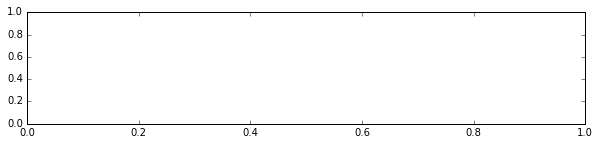

In [15]:
survey.dobs = pred
fig, ax = plt.subplots(1,1, figsize = (10, 2))
dat = EM.Static.Utils.StaticUtils.plot_pseudoSection(survey, ax, dtype='appr', sameratio=False, scale="linear", clim=(0, 200))

In [16]:
out = hist(np.log10(abs(dobsDC)), bins = 100)

NameError: name 'dobsDC' is not defined